In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [304]:
df = pd.read_csv('imdb_top_1000.csv')
df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [305]:
#removing the unnecessary columns
df.drop(['Poster_Link','Overview'],axis=1,inplace=True)

In [306]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [307]:
print("shape :- ",df.shape)
df.info()

shape :-  (1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [308]:
#null values
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [309]:
df.groupby('Genre')['Genre'].count()

Genre
Action, Adventure                5
Action, Adventure, Biography     1
Action, Adventure, Comedy       10
Action, Adventure, Crime         1
Action, Adventure, Drama        14
                                ..
Mystery, Romance, Thriller       1
Mystery, Sci-Fi, Thriller        2
Mystery, Thriller                9
Thriller                         1
Western                          4
Name: Genre, Length: 202, dtype: int64

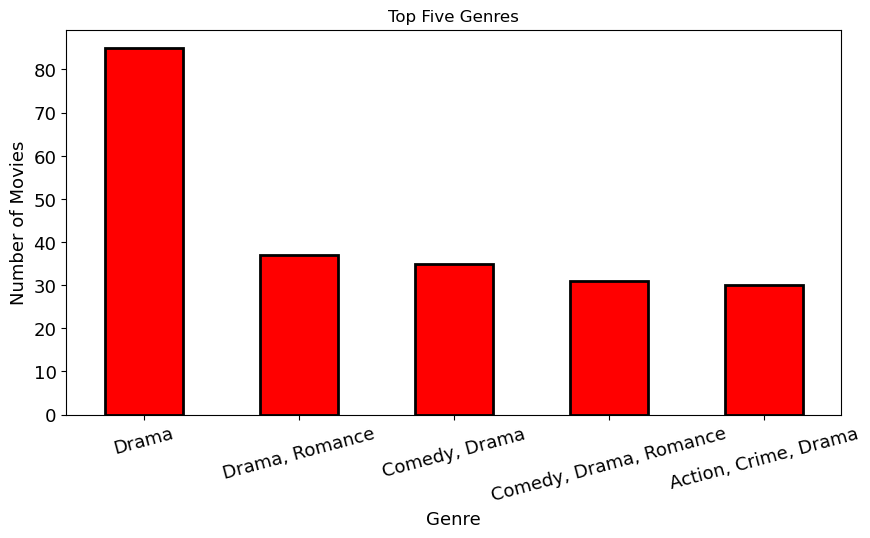

Total Number Of Unique Combinations of  Genre Analysis :-  202


In [310]:
#genre analysis
top_five_genres = df.Genre.value_counts().head()
top_five_genres.plot(kind='bar', figsize=(10,5), color='red', fontsize=13, rot=15, edgecolor='black', linewidth=2, title='Top Five Genres')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Number of Movies', fontsize=13)
plt.show()
genre_analysis = df.Genre.nunique()
print("Total Number Of Unique Combinations of  Genre Analysis :- ",genre_analysis)

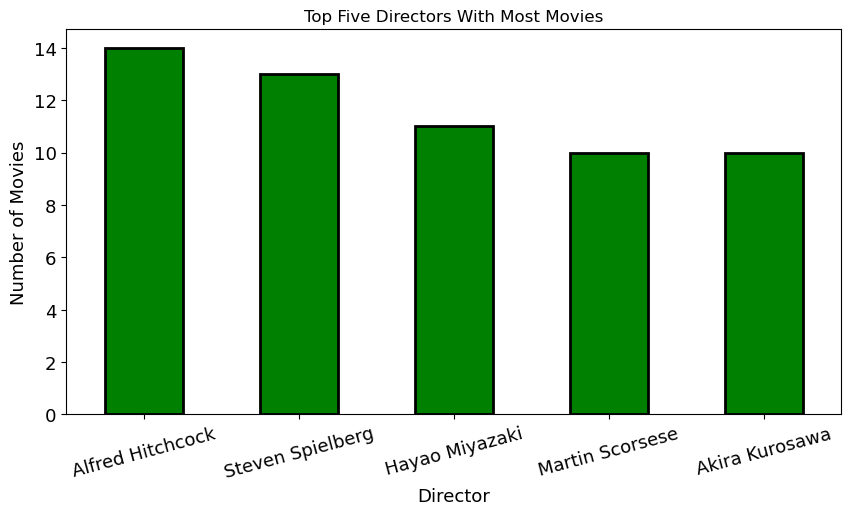

In [311]:
#director analysis

top_five_directors = df.Director.value_counts().head()
top_five_directors.plot(kind='bar', figsize=(10,5), fontsize=13, rot=15, edgecolor='black', linewidth=2, title='Top Five Directors With Most Movies',color = 'green')
plt.xlabel('Director', fontsize=13)
plt.ylabel('Number of Movies', fontsize=13)
plt.show()

In [312]:
df.columns


Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [313]:
ratings_df = df.groupby('Series_Title')['Series_Title','IMDB_Rating','No_of_Votes','Genre'].head().sort_values('No_of_Votes', ascending=False)
ratings_df

,Series_Title,IMDB_Rating,No_of_Votes,Genre
0,The Shawshank Redemption,9.3,2343110,Drama
2,The Dark Knight,9.0,2303232,"Action, Crime, Drama"
8,Inception,8.8,2067042,"Action, Adventure, Sci-Fi"
9,Fight Club,8.8,1854740,Drama
6,Pulp Fiction,8.9,1826188,"Crime, Drama"
...,...,...,...,...
570,Raazi,7.8,25344,"Action, Drama, Thriller"
718,Scarface: The Shame of the Nation,7.8,25312,"Action, Crime, Drama"
694,La planète sauvage,7.8,25229,"Animation, Sci-Fi"
721,God's Own Country,7.7,25198,"Drama, Romance"


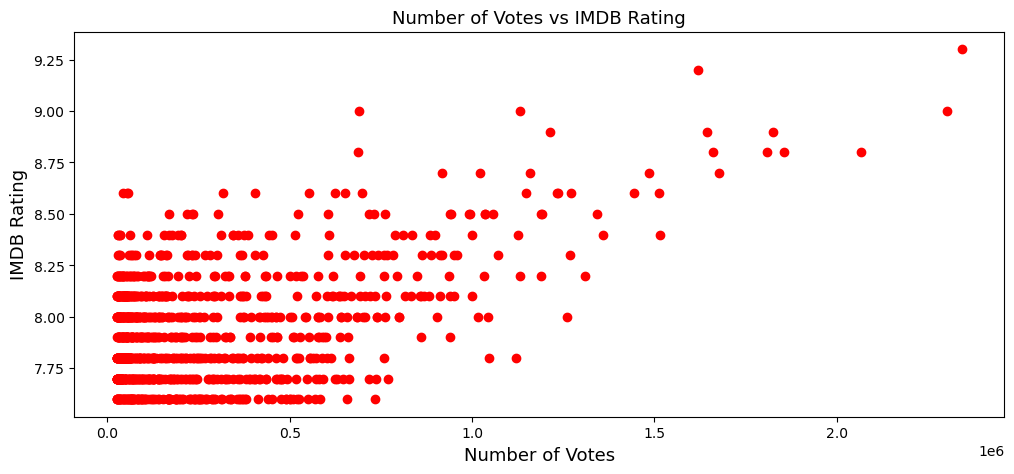

In [314]:
#finding the relationship between the number of votes and the ratings
plt.figure(figsize=(12,5))
plt.scatter(ratings_df['No_of_Votes'],ratings_df['IMDB_Rating'],color='red')
plt.xlabel('Number of Votes',fontsize=13)
plt.ylabel('IMDB Rating',fontsize=13)
plt.title('Number of Votes vs IMDB Rating',fontsize=13)
plt.show()


In [315]:
#pivot table
pivot = ratings_df.pivot_table(index='IMDB_Rating',columns='Series_Title',values='No_of_Votes').fillna(0)
print("Shape of the pivot table:-",pivot.shape)
pivot.head()

Shape of the pivot table:- (17, 999)


Series_Title,(500) Days of Summer,12 Angry Men,12 Years a Slave,1917,2001: A Space Odyssey,21 Grams,25th Hour,28 Days Later...,3 Idiots,300,...,Zelig,Zerkalo,Zindagi Na Milegi Dobara,Zodiac,Zombieland,Zootopia,Zulu,Zwartboek,À bout de souffle,Ôkami kodomo no Ame to Yuki
IMDB_Rating,,,,,,,,,,,,,,,,,,,,,
7.6,0.0,0.0,0.0,0.0,0.0,224545.0,169708.0,376853.0,0.0,732876.0,...,0.0,0.0,0.0,0.0,520041.0,0.0,0.0,0.0,0.0,0.0
7.7,472242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39881.0,0.0,0.0,466080.0,0.0,0.0,35999.0,72643.0,0.0,0.0
7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73251.0,0.0
7.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,434143.0,0.0,0.0,0.0,0.0


In [316]:
print("Average number of votes:-",ratings_df['No_of_Votes'].mean())
#finding total number of unique voters
print("unique voters:-",ratings_df['No_of_Votes'].nunique())
#finding total number of unique movies
print("unique movies:-",ratings_df['Series_Title'].nunique())
#finding total number of unique ratings
print("unique ratings:-",ratings_df['IMDB_Rating'].nunique())


Average number of votes:- 273692.911
unique voters:- 999
unique movies:- 999
unique ratings:- 17


In [317]:
ratings_df.IMDB_Rating.value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
9.0      3
8.9      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

In [319]:
df.Genre.value_counts()

Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: Genre, Length: 202, dtype: int64

In [324]:
def recommedation_system(genre,min_votes=10000):
    #filtering the data
    df1 = df[(df['Genre']==genre) & (df['No_of_Votes']>=min_votes)]
    #sorting the data
    df1 = df1.sort_values('IMDB_Rating',ascending=False)
    #returning the top 10 movies
    return df1.head(10)

recommedation_system('Drama')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
9,Fight Club,1999,A,139 min,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
17,One Flew Over the Cuckoo's Nest,1975,A,133 min,Drama,8.7,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,"112,000,000"
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
40,American History X,1998,R,119 min,Drama,8.5,62.0,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,"6,719,864"
53,Capharnaüm,2018,A,126 min,Drama,8.4,75.0,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,"1,661,096"
88,Jagten,2012,R,115 min,Drama,8.3,77.0,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,"687,185"
89,Jodaeiye Nader az Simin,2011,PG-13,123 min,Drama,8.3,95.0,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,"7,098,492"
91,Miracle in cell NO.7,2019,TV-14,132 min,Drama,8.3,NaN,Mehmet Ada Öztekin,Aras Bulut Iynemli,Nisa Sofiya Aksongur,Deniz Baysal,Celile Toyon Uysal,33935,NaN
97,Requiem for a Dream,2000,A,102 min,Drama,8.3,68.0,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,"3,635,482"
